# Hybrid Crytograph Project – Group 3

Names and students numbers: Bo Cresser (2547206), Matthew Pygott (2568691), Zhiyao Wang (2509441), Patrick Sherlock (2362239), Kabir Mehrotra Bhatia (2298888).

In this project, we will design a hybrid cryptography system using the RSA protocol for key exchange and the Vigenère cipher for bulk data transfer. We will then improve the security of your system by adding an extra layer of random encoding. Lastly, we will complete the extension section 6 (cracking the RSA protocol).

In [130]:
from IPython.display import Markdown, display
import json

# Table of contents generator for Jupyter Notebooks
def generate_toc(nb_path="Hybrid Cryptography.ipynb"):
    with open(nb_path, "r", encoding="utf-8") as f:
        nb = json.load(f)

    md_lines = ['<h1 style="font-size: 40px;">Table of Contents</h1>\n']

    for cell in nb["cells"]:
        if cell["cell_type"] == "markdown":
            for line in cell["source"]:
                line = line.strip()
                if line.startswith("#"):
                    level = len(line) - len(line.lstrip("#"))
                    title = line.lstrip("#").strip()
                    link = "#" + title.lower().replace(" ", "-")

                    indent = "&nbsp;" * 4 * (level - 1)
                    md_lines.append(
                        f'{indent}<a href="{link}" style="font-size:20px;">{title}</a><br>'
                    )

    display(Markdown("\n".join(md_lines)))

# Generate the table of contents
generate_toc()

<h1 style="font-size: 40px;">Table of Contents</h1>

<a href="#hybrid-crytograph-project-–-group-3" style="font-size:20px;">Hybrid Crytograph Project – Group 3</a><br>
<a href="#setup:" style="font-size:20px;">Setup:</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#collaborative-coding-infrastructure" style="font-size:20px;">Collaborative coding infrastructure</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#global-variables-and-reusable-functions" style="font-size:20px;">Global variables and reusable functions</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#cleaning-text" style="font-size:20px;">Cleaning text</a><br>
<a href="#importing-text-files" style="font-size:20px;">Importing text files</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#ciphering-to-file" style="font-size:20px;">Ciphering to file</a><br>
<a href="#question-1" style="font-size:20px;">Question 1</a><br>
<a href="#question-2" style="font-size:20px;">Question 2</a><br>
<a href="#question-3" style="font-size:20px;">Question 3</a><br>
<a href="#question-4" style="font-size:20px;">Question 4</a><br>
<a href="#question-6" style="font-size:20px;">Question 6</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#introduction" style="font-size:20px;">Introduction</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#testing-the-smallest-factor-function" style="font-size:20px;">Testing the smallest factor function</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#in-depth-exploration-of-the-pollard-rho-function" style="font-size:20px;">In depth exploration of the Pollard Rho function</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="#first-attempt-at-writing-the-pollard-rho-function-(v2)" style="font-size:20px;">First attempt at writing the Pollard Rho function (V2)</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="#quick-test-of-efficiency-of-smallest-factor-function-vs-pollard-rho-(v1)" style="font-size:20px;">Quick test of efficiency of smallest factor function vs Pollard Rho (V1)</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="#second-attempt-at-writing-the-pollard-rho-function-(v2)" style="font-size:20px;">Second attempt at writing the Pollard Rho function (V2)</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="#similarities-between-the-two-pollard-rho-functions-(v1)-and-(v2)" style="font-size:20px;">Similarities between the two Pollard Rho functions (V1) and (V2)</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="#differences-between-the-two-pollard-rho-functions-(v1)-and-(v2)" style="font-size:20px;">Differences between the two Pollard Rho functions (V1) and (V2)</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#in-depth-investigatio-of-smallest-factor-vs-pollard-rho-(v2)-functions" style="font-size:20px;">In depth investigatio of smallest factor vs Pollard Rho (V2) functions</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="#generating-data-for-larger-times" style="font-size:20px;">Generating data for larger times</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="#extrapolating-from-these-results" style="font-size:20px;">Extrapolating from these results</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="#discussion-of-unfeasabile-timings" style="font-size:20px;">Discussion of unfeasabile timings</a><br>
<a href="#conclusion-and-reflections" style="font-size:20px;">Conclusion and Reflections</a><br>

# Setup:

## Collaborative coding infrastructure

We spent most of the first two weeks of the project working out how to code collaboratively. Charles disuaded us from trying to use Notable or emailing each other sections of code like some Frankenstein's monster. This would be particularly problematic as the later questions depended heavily on the first question.

So, we attempted to use GitHub.

Matt, who is most experience with coding, having done Computer Science A Level, set up a GitHub repository for us. We then tried to set up Visual Studio Code, which we new could be integrated with GitHub to make it easier to pull and push changes.

However, this created it's own issues, as the whole team had to install and get used to VSCode, which is powerful but confusing to start with. Sam, one of the helpers in one of the tutorials was very helpful.

But, the technical difficulties kept coming.

From installing Python natively to cloning directly onto our computers, we overcame waves upon waves of novel challenges. In the end, we decided not to use branches as this added another layer of complication. Some members of the team also dragged and dropped their changes manually to and from GitHub as they could not get this feature within VSCode to work.

While there may have been a more effective method for our level of expertise (or lack of), once we worked out how to use GitHub, it did have the benefit of backing up everything we commit so that we could go back if anything was accidentally overwritten or deleted. It was also a very good was to learn how to use GitHub, in case any of us do more formal collaborative coding in future.

## Global variables and reusable functions
Early on in the project we realised that planning ahead and making functions reusable would be essential to a successful project as it is more efficient, can reduce time spent coding similar functions that we have already made and also it can create a more robust solution as the functions we use are well tested.

To start we defined some of the global variables and necessary libraries that we will use throughout the project.

In [10]:
#Libraries
import requests, os, random, time, statistics,string, matplotlib.pyplot as plt, numpy as np
from functions import *

In [11]:
#Global variables
global alphabet_upper
alphabet_upper="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
global alphabet_lower
alphabet_lower=alphabet_upper.lower()

## Cleaning text

As we are working with alphabetical messages and sometime keys in this project we decided to write a function clean_text(). The purpose of this is to only keep alphabetical characters from the inputted text. It has parameters of the text, preserve_case and verbose. preserve_case is a parameter that if False converts the message to upper case, this makes it reusable for more questions later on.

In [ ]:
#Input cleaning function
def clean_text(g_in_text,preserve_case=True,verbose=False):
    in_text=g_in_text#Make a local copy
    out_text=""
    if verbose:
        print("Input text is: ", in_text)
    for i in range (0,len(in_text)): #Run through all characters and add them if they are in the alphabet
        if in_text[i] in alphabet_lower:
            out_text+=in_text[i]
        elif in_text[i] in alphabet_upper:
            out_text+=in_text[i]
    if verbose:
        print("Text without spaces, symbols, numbers ",out_text)
    if not(preserve_case): #If we aren't preserving the case then we convert it all to upper case
        out_text=str(out_text.upper())
        if verbose:
            print("Case not preserved so convert it to uppercase ",out_text)
    return out_text

It works by iterating through each character in in_text and adding concatenating it to out_text if its in the alphabet. You can try it below.

In [13]:
message="James walked his dog Jeremery!"
print("The cleaned version of that message is: ",clean_text(message,True))

The cleaned version of that message is:  JameswalkedhisdogJeremery


## Importing text files

We decided to use Jane Austen's Pride and Prejudice throughout this project, and we imported it using the code below, which is without comments since simple setup code taken from the resources you provided.

The lines to import the code below are now commented out, and the files already included in the text_files folder, to save you time when marking our project.

In [78]:
def url_to_text_utf8(url):
    '''
    Given a url for a text that is 
    'utf-8' encoded this function 
    returns that text.
    '''
    response = requests.get(url)
    response.encoding = 'utf-8-sig'
    return response.text

# austen_text = url_to_text_utf8("https://www.gutenberg.org/files/1342/1342-0.txt")

def text_to_file(text_string, file_name):
    '''
    Write the string text_string to file with 
    name file_name (and return None). 
    Makes directory if it does not exist.
    '''
    folder = os.path.dirname(file_name)
    
    if folder and not os.path.exists(folder):
        os.makedirs(folder)   # create folder(s) automatically

    with open(file_name, 'w', encoding='utf-8-sig', errors='ignore') as f:
        f.write(text_string)

# text_to_file(austen_text,"text_files/jane_austen.txt")

def file_to_text(file_name):
    '''
    Read the text file with name file_name
    and return its contents as a string.
    '''
    with open(file_name,'r',encoding='utf-8-sig', errors='ignore') as f:
        text = f.read()
    return text

# new_austen_text = file_to_text("text_files/jane_austen.txt")

## Ciphering to file
The first part asks us to read files, encrypt and decrypt the data then write this to other files. This is a good opportunity for a reusable procedure as we will use similar functionality multiple times in testing so having this procedure will improve space efficiency. cipher_to_file() will take 5 parameters, input_file_name, output_file_name, cipher_function (either caesar_cipher or v_cipher), key(integer or string depending on the cipher function) , encrypt (boolean).

In [ ]:
#Function which applies a cipher function to each line of a text file and writes the output to another text file
def cipher_to_file(input_file_name,output_file_name,cipher_function,key,encrypt):
    output_text=open("text_files/"+input_file_name+".txt","w")
    input_text=open("text_files/"+input_file_name+".txt","r")
    line=input_text.readline()
    while line!="":
        output_text.write(cipher_function(line,key,encrypt)+"\n")
        line=input_text.readline()
    input_text.close()
    output_text.close()

# Question 1

**Implementing functions to encrypt and decrypt messages using the Caesar cipher and the Vigenère cipher.**

## Caesar Cipher

### Function

First we wrote the function caesar_cipher(). This is one function to both encrypt and  decrypt messages depending on the argument passed in by the user, this  is to improve space  effiency and increase robustness. Its parameters are g_input_text where g stands for given, g_key,encrypt and verbose.

This is our first demonstration of reusable functions. It is more space efficient and more robust as if we modify the functionality of the reusable function it changes for every part of the code it is used, otherwise we would have to change many parts which can cause errors. 

The inputs are g_input_text which is given input text passed in as a string, g_key which is given key also passed in as a string of any length, encrypt which is a boolean to decide if the function is encrypting or decrypting, verbose which is a boolean used for error checking.

In [ ]:
#Caesar cipher function
def caesar_cipher(g_input_text,g_key,encrypt=True,verbose=False):

    #Input_text should be fed in as a string, key should be any integer although it only is unique from 0,26

    input_text=g_input_text #Creating local copies of arguments
    
    output_text=""
    if encrypt:
        key_multiplier=1
    else:
        key_multiplier=-1
    key=g_key*key_multiplier #g for given

    input_text=clean_text(input_text) #Clean the input

    for i in range (0,len(input_text)):
        if input_text[i] in alphabet_upper:
            position_in_alphabet=alphabet_upper.index(input_text[i])
            output_text+=alphabet_upper[(position_in_alphabet+key)%26]
        else: #If adding support for spaces later add it below and change the clean_text function to suppport this
            position_in_alphabet=alphabet_lower.index(input_text[i])
            output_text+=alphabet_lower[(position_in_alphabet+key)%26]
    return output_text

### Explanation

It works in a few simple steps:
1. Make copies of input text and key to make sure they are taken as copies.
2. If the user has specified to encrypt the message then our key is  multiplied by one, otherwise it is multiplied by -1 which means when the shift is applied it is in the opposite direction effectively decrypting the message.
3. We  iterate through the input message and for each character we select the appropriate case of alphabet and we add the key to its numerical position in the alphabet. We take the mod of this to make sure it lies betweeen 0 and 26 then we add the character at that position to the output.
4. We output the output_text

### Examples

See examples below on how it works on different messages and with the null shift.

In [ ]:
#First we see how it works for a normal key
print(message, "encrypted with key=5 is: ")
print(caesar_cipher(message,5))

#Show that the decrypting works
print("\nWe can decrypt this by using the same key: ")
print(caesar_cipher(caesar_cipher(message,5), 5,False))

#Show that it works for the null shift
print("\nThe caesar cipher function also works for the null shift (key=0), this outputs the same message as inputted \nalbeit cleaned by the clean text function:")
print(caesar_cipher(message,0))

#Show that it works for random key
r_key=random.randrange(0,26)
print("\nThe function also works for a random key e.g.",r_key, "which gives the encrypted message:")
print(caesar_cipher(message,r_key))
print("Decrypting it works still:")
print(caesar_cipher(caesar_cipher(message,r_key),r_key,False))

#We can read data from a text file and encrypt it then write it to another text file
print("\nWe can read from a file, encrypt it and write it to a file.")
cipher_to_file("plain_text","cipher_text",caesar_cipher,r_key,encrypt=True)

print("We can do the same but decrypting a file simply by using the parameter encrypt=False in the code below")
print("Check the contents of cipher_text and plain_text to see that this has worked")
cipher_to_file("cipher_text","plain_text",caesar_cipher,r_key,encrypt=False)


James walked his dog Jeremery! encrypted with key=5 is: 
OfrjxbfqpjimnxitlOjwjrjwd

We can decrypt this by using the same key: 
JameswalkedhisdogJeremery

The caesar cipher function also works for the null shift (key=0), this outputs the same message as inputted 
albeit cleaned by the clean text function:
JameswalkedhisdogJeremery

The function also works for a random key e.g. 19 which gives the encrypted message:
CtfxlptedxwablwhzCxkxfxkr
Decrypting it works still:
JameswalkedhisdogJeremery

We can read from a file, encrypt it and write it to a file.
We can do the same but decrypting a file simply by using the parameter encrypt=False in the code below
Check the contents of cipher_text and plain_text to see that this has worked


## Vignere Cipher

### Function

Next was the Vigenere cipher. We named the function v_cipher() as it is clearly distinguishable from caesar_cipher() and hard to misspell. Once again this is only one function to both encrypt and decrypt. It uses caesar cipher to shift each character in the message by an amount given in the key.

In [ ]:
#Vigenere cipher

def v_cipher(g_input_text,g_key,encrypt=True,verbose=False):
    input_text=clean_text(g_input_text)
    key=clean_text(g_key,preserve_case=False)
    output_text=""

    #for each letter in inpur text message we perform a caesar cipher on it using the ith char in key
    for i in range (0,len(input_text)):
        ith_key=alphabet_upper.index(key[i%len(key)])
        if verbose:
            print("Ith key is", ith_key)
        output_text+=caesar_cipher(input_text[i],ith_key,encrypt)
    return output_text

### Explanation

This function works in a few simple steps. 
1. We make copies of the input text and key and clean them both. Cleaning the key is really helpful here as it means the function can consistently decrypt texts even if someone drops a case in one letter of the key. Note we capitalise the key in the clean_text function by setting preserve_case=False.
2. We iterate through each character in the input text. For each character we cipher it using the part of the key in the corresponding place. Each character in the key is equivalent to an integer that we can encrypt with (with A being the null shift 0). If the message is longer than the key then we start from the beginning of the key again hence the modulus in the line defining ith_key.
3. Using the ith_key we encrypt each character in input_text and concatenate it onto output_text
4. We return output_text

### Examples

Below are some tests to show the functionality and robustness of this function.

In [ ]:
#First show basic functionality of the function
print("Encrypting our standard message with key='HANDS' we get: ")
print(v_cipher(message,"HANDS"))
print("Decrypting this with the same key gets us: ")
print(v_cipher(v_cipher(message,"HANDS"),"HANDS",False))

#Testing varied key inputs
print("\nWe can see that the key 'AAA' is the null cipher, which gives, as expected:")
print(v_cipher(message,"AAA"))
print("Of course, using the same key to 'decrypt' we get:")
print(v_cipher(v_cipher(message,"AAA"),"AAA",False))

print("\nWe can also introduce different cases and symbols to our key and see it still works, for example:")
print("The key 'Ha2Nd s' gives:")
print(v_cipher(message,"Ha2Nd s"))
print("Using the same key to decrypt we get:")
print(v_cipher(v_cipher(message,"Ha2Nd s"),"Ha2Nd s",False))

print("\nMorevoer, we can also encypt with a key longer than the message for example:")
print("The key 'Harry went for a walk with his cat Harriot and stopped at the park' gives:")
print(v_cipher(message,"Harry went for a walk with his cat Harriot and stopped at the park"))
print("Using the same key to decrypt we get:")
print(v_cipher(v_cipher(message,"Harry went for a walk with his cat Harriot and stopped at the park"),"Harry went for a walk with his cat Harriot and stopped at the park",False))

#We can also encrypt and decrypt using a random key
r_v_key=""
for i in range(0,random.randrange(1,50)):
    r_v_key+=str(alphabet_upper[random.randrange(0,26)])
print("\n We can use a key of random letters and length, for example:")
print("The key", r_v_key, "gives:")
print(v_cipher(message,r_v_key))
print("Using the same key to decrypt we get:")
print(v_cipher(v_cipher(message,r_v_key),r_v_key,False))

#We can also use vigenere cipher to encrypt to files similar to how we did with caesar cipher
print("\nWe can read from a file, encrypt it and write it to a file.")
cipher_to_file("plain_text","cipher_text",v_cipher,r_v_key,encrypt=True)

print("We can do the same but decrypting a file simply by using the parameter encrypt=False in the code below")
print("Check the contents of cipher_text and plain_text to see that this has worked")
cipher_to_file("cipher_text","plain_text",v_cipher,r_v_key,encrypt=False)

Encrypting our standard message with key='HANDS' we get: 
QazhkdaynwkhvvvvgWhjlmruq
Decrypting this with the same key gets us: 
JameswalkedhisdogJeremery

We can see that the key 'AAA' is the null cipher, which gives, as expected:
JameswalkedhisdogJeremery
Of course, using the same key to 'decrypt' we get:
JameswalkedhisdogJeremery

We can also introduce different cases and symbols to our key and see it still works, for example:
The key 'Ha2Nd s' gives:
QazhkdaynwkhvvvvgWhjlmruq
Using the same key to decrypt we get:
JameswalkedhisdogJeremery

Morevoer, we can also encypt with a key longer than the message for example:
The key 'Harry went for a walk with his cat Harriot and stopped at the park' gives:
QadvqseydjryiodzqFmkltmja
Using the same key to decrypt we get:
JameswalkedhisdogJeremery

 We can use a key of random letters and length, for example:
The key IANLAJLTTUALQGIKIBDVCXRIGLBIMREUOTKTJIOFCOHMKDPS gives:
RazpsfledydsyylyoKhmgjvze
Using the same key to decrypt we get:
Jameswalke

# Question 2

**Implementing a function to systematically break the Caesar cipher using letter frequency analysis.**

## Write a function to calculate letter frequencies

In [131]:
# 1 open the decrypted jane austen file and take a short section to get typical english letter frequencies
with open("text_files/jane_austen.txt", "r", encoding="utf-8") as f:

    plaintext_jane = f.read()

reference_text = plaintext_jane[:1000]  # we'll use just the first 1000 characters to keep it manageable

# 2 count how often each letter appears in the reference text, and convert to percentages
from collections import Counter
import string

def calculate_letter_frequencies(text):
    letters = [c.upper() for c in text if c.isalpha()]  # ignore punctuation, spaces, numbers etc.
    total = len(letters)
    freq = Counter(letters)
    return {letter: (freq.get(letter, 0) / total) * 100 for letter in string.ascii_uppercase}

ENGLISH_FREQ = calculate_letter_frequencies(reference_text)  # this will be our 'expected' frequency profile

## Calculate letter frequencies for each shift

In [132]:
# 3 write a helper to shift a single letter backwards in the alphabet by a fixed amount
def shift_letter(letter, shift):
    if letter.isalpha():
        base = ord('A') if letter.isupper() else ord('a')
        return chr((ord(letter) - base - shift) % 26 + base)
    else:
        return letter  # keep things like spaces and commas unchanged

# 4 apply the shift to an entire string
def decrypt_caesar(text, shift):
    return ''.join(shift_letter(c, shift) for c in text)

# 5 count how often each letter shows up in a piece of text
def get_letter_frequencies(text):
    letters = [c.upper() for c in text if c.isalpha()]
    total = len(letters)
    freq = Counter(letters)
    return {letter: (freq.get(letter, 0) / total) * 100 for letter in string.ascii_uppercase}

## Compare two sets of frequencies for each shift

In [133]:
# 6 use the chi-squared test to compare two sets of frequencies (lower frequency is a better match)
def chi_squared_statistic(observed_freq, expected_freq):
    chi2 = 0
    for letter in string.ascii_uppercase:
        expected = expected_freq.get(letter, 0)
        observed = observed_freq.get(letter, 0)
        if expected > 0:
            chi2 += ((observed - expected) ** 2) / expected
    return chi2

# 7 try all 26 shifts and pick the one that gives the lowest chi-squared score
def break_caesar(cipher_text, reference_freq):
    best_shift = 0
    lowest_chi2 = float('inf')
    best_guess = ""
    for shift in range(26):
        candidate = decrypt_caesar(cipher_text, shift)
        observed_freq = get_letter_frequencies(candidate)
        chi2 = chi_squared_statistic(observed_freq, reference_freq)
        if chi2 < lowest_chi2:
            best_shift = shift
            lowest_chi2 = chi2
            best_guess = candidate
    return best_shift, best_guess

## Show that the decryption works on Pride and Prejudice

In [ ]:
# 8 now simulate encryption by shifting the real text forward (to pretend it's been caesar encrypted)
simulated_shift = 7
concatenated_jane = plaintext_jane[:1000]
encrypted_jane = decrypt_caesar(concatenated_jane, -simulated_shift)  # negative shift = forward in alphabet

# 9 try to recover the original using our caesar breaker
guessed_shift, recovered_text = break_caesar(encrypted_jane, ENGLISH_FREQ)

# 10 print the result so we can check if it worked
print("Guessed caesar shift:", guessed_shift)
print("\100 characters from encrypted text:\n")
print(encrypted_jane[:100])
print("\n100 characters from decrypted text:\n")
print(recovered_text[:100])

Guessed caesar shift: 7
@ characters from encrypted text:

﻿*** ZAHYA VM AOL WYVQLJA NBALUILYN LIVVR 1342 ***




                            [Pssbzayhapvu:

 

100 characters from decrypted text:

﻿*** START OF THE PROJECT GUTENBERG EBOOK 1342 ***




                            [Illustration:

 


# Question 3

**Writing functions that implement the Hybrid System described below:**

"Hybrid System. Alice generates her private and public key. Bob generates a Vigenère key and Vigenère encrypts/enciphers his message with this key. Then, after slicing it into parts (if necessary) he encodes and RSA encrypts his Vigenère key using Alice’s public key
and finally sends both the resulting tuple of ciphertext integers and his Vigenère encrypted message to Alice. Alice uses her private key to RSA decrypt the tuple of ciphertext integers. She then converts/decodes the resulting integers to strings and so reconstructs the Vigenère key. She uses this to Vigenère decrypt/decipher Bob’s message."

To write these functions, we started by...

In [80]:
# first we take the RSA generator function from the lectures

def RSA_key_generator(bitlength):
    """This will generate RSA keys. This is a version of the private key.
    The output is ((PublicKey), PrivateExp, Factorisation).
    The PublicKey can be published, PrivateExp is needed to decrypt.
    Factorisation is not needed, but must be kept secret."""
    ## Generate two large primes.
    p = random_prime(bitlength)
    q = random_prime(bitlength)
    N = p*q
    
    ## Next, get phi and use it to get a public and private exponent.
    phi = (p-1)*(q-1)
    ## Choose encryption exponent e randomly between 1 and p and q.
    e = random.randint(1,min(p,q))
    ## It must be coprime to phi though. We use rejection sampling again:    
    while gcd(e,phi) > 1:
        e = random.randint(1,min(p,q))
    
    ## Finally, get d using 'pow'
    ## (the extended Euclid's algorithm could do this too).
    d = pow(e,-1,phi)
    
    ## Then return the keys.
    return ((N,e),d%phi,{p:1,q:1})

# we want to easily obtain the public key and private key from our RSA generator
def public_key_from_RSA(RSA_key):
    return RSA_key[0]

def private_key_from_RSA(RSA_key):
    private_key = (public_key_from_RSA(RSA_key)[0],RSA_key[1])
    return(private_key)
    
# we also take the text to integer and integer to text conversion functions from week 8
def char_to_byte(char): 
    """
    Returns the 8 bit binary representation (padded with 
    leading zeros when necessary) of ord(char), i.e. of 
    the order of the input character char. 
    """
    byte_string = bin(ord(char))[2:]            # The order of char as a binary string 
    num_zeros = 8 - len(byte_string)            # The number of zeros needed to pad out byte_string
    byte_string = '0' * num_zeros + byte_string # Now pad out byte_string with num_zeros many zeros
                                                # to obtain the 8-bit binary representation
    return byte_string
    
def convert_to_integer(text,verbose=False): 
    """
    Returns an integer that encodes the input string text. 
    Each character of text is encoded as a binary string of 
    8 bits. These strings are concatenated with a leading 1
    and the resulting binary string is converted into the 
    returned integer.
    """
    bin_string = '1'
    for letter in text: 
        bin_string = bin_string + char_to_byte(letter)
    if verbose: 
        print("The binary representation of this message is:")
        print(bin_string)
    return int(bin_string,2)

def convert_to_text(number): 
    """ 
    Returns a string that is the decoding of the input integer number.
    This is done by converting number to a binary string, removing the 
    leading character '1', slicing out each 8 bit substring consecutively,
    converting each such string to the character it encodes and concatenating
    these characters to obtain the decoded string.    
    """
    # Remove '0b1' from the string
    bin_string = bin(number)[3:]    
    text = ''                           
    length = len(bin_string)
    for i in range(0,length,8):  
        # Pick out binary strings, 8 bits at a time
        byte_string = bin_string[i:i+8]   
        # Convert byte_string to a character before 
        # appending it to text 
        text = text + chr(int(byte_string,2))  
    return text
    
# then we create RSA encryption and decryption functions

def rsa_encrypt(m, public_key):
    N, e = public_key
    # returns c = m^e mod N
    return pow(m, e ,N)

def rsa_decrypt(c, private_key):
    N, d = private_key
    # returns m = c^d mod N
    return pow(c, d, N)

Next we use these functions, in addition to the vigenere cipher function from part 1 to implement the Hybrid System for securely and efficiently encrypting and decrypting messages. First, we implement the hybrid encryption function...

In [81]:
def hybrid_encrypt(message, vigenere_key, rsa_public_key):
    encrypted_message = v_cipher(message, vigenere_key, encrypt=True) # encrypt our message
    N = rsa_public_key[0] # fetch N from (N, e)
    block_length = (N.bit_length()//8)-1 # determine safe block length by d
    encrypted_key_tuple = []
    for i in range(0, len(vigenere_key), block_length):
        key_block = vigenere_key[i:i+block_length] # splits vig key into blocks of safe length
        block_int = convert_to_integer(key_block) # converts block into integer
        encrypted_int = rsa_encrypt(block_int, rsa_public_key) # encrypts block integer
        encrypted_key_tuple.append(encrypted_int) # adds block to encrypted key 
    return tuple(encrypted_key_tuple), encrypted_message

Our encryption function can be broken down into a number of easy steps:

1. We encrypt our message using the vigenere cypher function from part 1, with our chosen vigenere key.
2. Since RSA can only encrypt integers smalled than its modulus N, we split our vigenere key into manageable blocks. We calculate the length of these blocks by dividing the bit length of N by 8 to calculate the number of digits in N, then subtracting 1, so our block length is one digit less than N.
3. We then convert (to an integer) and encrypt each of these blocks using RSA encryption.
4. Finally we return the tuple containing the encrypted vigenere key blocks and the encrypted message.

We can now implement the hybrid decryption function.

In [82]:
def hybrid_decrypt(encrypted_pair, rsa_private_key):
    encrypted_key_tuple, encrypted_message = encrypted_pair # split our pair
    decrypted_key = ''
    for encrypted_int in encrypted_key_tuple:
        decrypted_int = rsa_decrypt(encrypted_int,rsa_private_key) # decrypt each block
        block_text = convert_to_text(decrypted_int) # convert to text
        decrypted_key += block_text # add converted block to key
    decrypted_message = v_cipher(encrypted_message, decrypted_key, encrypt = False) # decrypts the message
    return decrypted_message

Our decryption function can also be broken down into steps:
1. First we split the encrypted key and message pair into seperate parts
2. Then decrypt each vigenere key block using the private key and convert back to text
3. The vigenere key is pieced back together
4. The message is decrypted using the reconstructed vigenere key

Now, Alice and Bob can give it a go!

Please be patient, this code will take

In [ ]:
# First, Alice generates her public and private keys using the RSA generator function. She chooses a key length of 512
rsa_key_1 = RSA_key_generator(512)
pub_key_1 = public_key_from_RSA(rsa_key_1)
pri_key_1 = private_key_from_RSA(rsa_key_1)
# Next, Bob chooses his message and opts to randomly generate his Vigenere key,
# with the length of the key equal to the length of his message
message_1 = 'The Quick Brown Fox Jumped Over The Lazy Dog'
vigenere_key_1 = ''.join(random.choices(string.ascii_uppercase, k=len(message_1)))

# Then using Alice's public key and his random Vigenere key, Bob encrypts his message
encrypted_pair_1 = hybrid_encrypt(message_1, vigenere_key_1, pub_key_1)

# Alice can now decrypt Bob's message using her private key
decrypted_message_1 = hybrid_decrypt(encrypted_pair_1, pri_key_1)
print("Bob's message is: " + decrypted_message_1)
print('Success!')

Bob's message is: TheQuickBrownFoxJumpedOverTheLazyDog
Success!
The longer message is: STARTOFTHEPROJECTGUTENBERGEBOOKIllustrationGEORGEALLENPUBLISHERCHARINGCROSSROADLONDONRUSKINHOUSEIllustrationReadingJanesLettersChapPRIDEandPREJUDICEbyJaneAustenwithaPrefacebyGeorgeSaintsburyandIllustrationsbyHughThomsonIllustrationRuskinCharingHouseCrossRoadLondonGeorgeAllenCHISWICKPRESSCHARLESWHITTINGHAMANDCOTOOKSCOURTCHANCERYLANELONDONIllustrationToJComynsCarrinacknowledgmentofallIowetohisfriendshipandadvicetheseillustrationsaregratefullyinscribedHughThomsonPREFACEIllustrationWaltWhitmanhassomewhereafineandjustdistinctionbetweenlovingbyallowanceandlovingwithpersonalloveThisdistinctionappliestobooksaswellastomenandwomenandinthecaseofthenotverynumerousauthorswhoaretheobjectsofthepersonalaffectionitbringsacuriousconsequencewithitThereismuchmoredifferenceastotheirbestworkthaninthecaseofthoseotherswhoarelovedbyallowancebyconventionandbecauseitisfelttobetherightandproperthingtolovethemAndinthesectfairlyl

Now, let's test the efficiency of our functions by encrypting a large amount of text.

In [91]:
# Testing the efficiency of our functions by encrypting a large amount of text.
reference_text = plaintext_jane[:1000] # we'll use just the first 1000 characters to keep it manageable
rsa_key_2 = RSA_key_generator(512)
pub_key_2 = public_key_from_RSA(rsa_key_2)
pri_key_2 = private_key_from_RSA(rsa_key_2)
vigenere_key_2 = ''.join(random.choices(string.ascii_uppercase, k=len(reference_text)))
encrypted_pair_2 = hybrid_encrypt(reference_text, vigenere_key_2, pub_key_2)
decrypted_message_2 = hybrid_decrypt(encrypted_pair_2, pri_key_2)
print('The longer message is: '+ decrypted_message_2)
# We have success! The message was quickly encrypted and decrypted. It's a little hard to read due to the absense of spacing
# and punctuation, but it proves our functions work efficiently and as intended!

The longer message is: STARTOFTHEPROJECTGUTENBERGEBOOKIllustrationGEORGEALLENPUBLISHERCHARINGCROSSROADLONDONRUSKINHOUSEIllustrationReadingJanesLettersChapPRIDEandPREJUDICEbyJaneAustenwithaPrefacebyGeorgeSaintsburyandIllustrationsbyHughThomsonIllustrationRuskinCharin


Wow, we can see that the code processes 1000 characters in under 2 seconds.

# Question 4

**Redesigning our system by performing a random encoding of each letter of the alphabet in to one or more 2-grams.**

There are 26 ·25 = 650 2-grams made up of distinct letters. The goal is to encode the alphabet by 2-grams in such a way that the frequency of occurrence of each letter is disguised. We add this type of encode system before applying the Vigenère cipher and decode it after the Vigenère cipher.

To implement this encoding, we first generate all 26 * 25 = 650 possible bigrams composed of two distinct uppercase letters.

In [ ]:
#generate bigrams 
def generate_bigrams():
    letters = string
    letters = alphabet_upper  #all letters
    all_bigrams = []   
    for a in letters:
        for b in letters:
            if a != b:                      #different letters
                all_bigrams.append(a+b)
    return all_bigrams

These bigrams are randomly shuffled and then be assigned to letters according to statistics on the frequency of English letters.

In [26]:
#this is a function which works to assign bigrams to each letter
def bigrams_mapping(total_bigrams = 400):
    #the frequency of English letters provided by google
    letter_frequency = {
        'E': 0.127, 'T': 0.091, 'A': 0.0812, 'O': 0.0768, 
        'I': 0.0757,'N': 0.0723, 'S': 0.0651, 'R': 0.0628, 'H': 0.0505, 
        'L': 0.0407, 'D': 0.0382, 'C': 0.0334, 'U': 0.0273, 'M': 0.0251, 
        'W': 0.0168, 'F': 0.024, 'G': 0.0187, 'Y': 0.0166, 'P': 0.0214, 
        'B': 0.0148, 'V': 0.0105, 'K': 0.0054, 'X': 0.0023,'J': 0.0016,
        'Q': 0.0012, 'Z': 0.0009
    }
    letters = alphabet_upper
    all_bigrams = generate_bigrams()
    #shuffle bigrams randomly
    random.shuffle(all_bigrams)

    #assign bigrams according to their frequency
    #sizes is the amount of bigram that each letter will be assigned
    sizes = {}
    for ch in letters:
        sizes[ch] = letter_frequency[ch] * total_bigrams

    bigrams_per_letter = {}
    for ch in letters:
        #transfer the value into integer
        num = round(sizes[ch])
        #ensure every letter receives at least one bigram
        if num < 1:
            num = 1
        bigrams_per_letter[ch] = num

    #here we do the seperation
    map_bigrams = {}
    index = 0
    for ch in letters:
        k = bigrams_per_letter[ch]
        #slicing the shuffled bigrams list
        map_bigrams[ch] = all_bigrams[index : index + k]
        #move the index forward so the next letter will get a new part
        index += k
    return map_bigrams

The following function shows the encoding part. Function "message_encode" replaces each plaintext letter with a randomly chosen bigram

In [27]:
def message_encode(message, map_bigrams):
    #Transfer all plaintext into uppercase letters
    message = message.upper()
    #remove the spaces
    message = message.replace(" ", "")
    encoded = ""

    for ch in message:
        if ch in map_bigrams:
            #get the list of bigrams assigned to this letter
            bigram_list = map_bigrams[ch]
            #randomly choose one bigram from the list
            chosen_bigram = random.choice(bigram_list)
            #add the chosen bigram to the encoded text
            encoded = encoded + chosen_bigram
        else:
            print("Error")
            return None
        
    return encoded

To recover the plaintext from the ciphertext, there are two steps to do. First we find the rule of mapping each bigram back to the letter according to the mapping table provided during the encryption. Second, we cut the ciphertext into two characters each time, and each pair of characters forms one bigram.
Finally we use the dictionary to change the bigrams to the original text.

In [28]:
def inverse_mapping(map_bigrams):
    #empty dictionary to store the inversed mapping 
    inverse = {}
    for letter in map_bigrams:
        bigrams_list = map_bigrams[letter]

        for code in bigrams_list:
            #inverse the mapping
            inverse[code] = letter

    return inverse

#decode part
def bigrams_decode(encoded, map_bigrams):
    inverse = inverse_mapping(map_bigrams)

    #check whether the length of ciphertext is divisible by 2
    #if not, it should be invalid
    if len(encoded) % 2 != 0:
        print("error")
        return None
    
    #empty string to store the final decoded plaintext
    decoded_text = ""
    for i in range(0, len(encoded), 2):
        #loop through the ciphertext 2 characters at a time
        bg = encoded[i: i + 2]
        decoded_text += inverse[bg]

    return decoded_text

Below is a test that shows this program works.

In [29]:
#test
mapping = bigrams_mapping(400)
messages = [
    "HELLO",
    "THIS IS A TEST",
]
for msg in messages:
    print("The plaintext is :")
    print(msg)

    encoded_bigram = message_encode(msg, mapping)
    print("Bigrams encoded ciphertext:")
    print(encoded_bigram)

    decoded_text = bigrams_decode(encoded_bigram, mapping)
    print("Decoded text:")
    print(decoded_text)

    no_space_msg = msg.replace(" ", "")
    no_space_msg = no_space_msg.upper()
    
    if decoded_text == no_space_msg:
        print("Pass, the decoded text matches the original text")
    else:
        print("Fail, the decoded text does not match the orginal text")



The plaintext is :
HELLO
Bigrams encoded ciphertext:
NCJVMZYCQJ
Decoded text:
HELLO
Pass, the decoded text matches the original text
The plaintext is :
THIS IS A TEST
Bigrams encoded ciphertext:
BGBHEBSYRCDSAONMIVXKPD
Decoded text:
THISISATEST
Pass, the decoded text matches the original text


Compared to the system in question 3, the hybrid system in question 4 provided a stronger security guarantees. 
In question 3, the security of the hybrid system relies almost entirely on RSA. Once if the key length of the Vigenère cipher is estimated (like Kasiski style analysis mentioned in question 5 below), the key can be recovered by frequency analysis.
In question 4 however, the random bigram encoding makes an effort to hide the real letter frequencies and makes inferring both key length and frequency harder.
Therefore, the encode system in question 4 is strictly more secure than that in question 3.

# Question 6

**Cracking the RSA protocol**

## Introduction

We decided to tackle question 6 as this quesion links to number theory and the RSA protocol, which we had found interesting in the week 8 tutorial and 4th homework.

The aim of this question is to compare methods of finding the smallest factor of large primes. The idea is that if the RSA protocol was incorrectly implemented and p and q were too small, we would be able to factorise N with these methods.

## Testing the smallest factor function

Firstly, we will check whether the smallest_factor_function is working correctly. To do this, we generate primes p and q,  input N = p · q to the smallest factor function, and inspect whether the output is itself p or q.

In [30]:
# Write function to test whether the factor function works as intended
def test_factor_function(input_function):
    p = random_prime(16)
    q = random_prime(16)
    N = p * q
    factor = input_function(N)
    print("p =", p)
    print("q =", q)
    print("N =", N)
    print("Found factor:", factor)
    if factor == p or factor == q:
        print("Found factor is correct.")
    
# Test whether the function works as intended for random p and q
print("Testing smallest factor algorithm with random N for 16 bit p and q:")
test_factor_function(smallest_factor)

Testing smallest factor algorithm with random N for 16 bit p and q:
p = 47147
q = 38923
N = 1835102681
Found factor: 38923
Found factor is correct.



The function seems to be working!

We will now test the functino to test its efficiancy.

Starting with l = 16 bit primes, we wrote an algorithm that shows the average computation time on input N = p · q for k-bit primes p, q for k = l, l + 1, l + 2, . . . . 

We have used 3 iterations for each bit length to get an average. We decided to just test computation times up to 1 second at this stage, and then test up to 15 minutes once we know the procedures are working.

In [31]:
# Define function to time factorisation function
def time_factorisation(l, max_time, iterations, input_function, Verbose=False):
    bit_lengths = []
    avg_times = []
    
    while True:
        times = []
        for _ in range(iterations):  # Run 3 trials for each bit length
            p = random_prime(l)
            q = random_prime(l)
            N = p * q
            start_time = time.time()
            input_function(N)
            end_time = time.time()
            times.append(end_time - start_time)

        avg_time = statistics.mean(times)
        # print(f"Bit length: {l}, Average time: {avg_time:.2f} seconds")
        bit_lengths.append(l)
        avg_times.append(avg_time)
        if avg_time > max_time:
            return [bit_lengths, avg_times]
            break
        l += 1

# Define parameters to generate data on algorithm timings
l = 16

# Graph1 will demonstrate the performance difference between smallest factor algorithm and pollard rho
# But it will also justify my confusion about the difference between pollard rho version 1 and version 2
max_time = 0.3
iterations = 1

# Generate data on smallest factor function timings
smallest_factor_data = time_factorisation(l, max_time, iterations, smallest_factor)
print("Timing data for smallest factor function (bit lengths and average times):")
print(smallest_factor_data)

Timing data for smallest factor function (bit lengths and average times):
[[16, 17, 18, 19, 20, 21, 22, 23], [0.00432133674621582, 0.007929563522338867, 0.01641559600830078, 0.04089164733886719, 0.058606624603271484, 0.1603395938873291, 0.2431659698486328, 0.5736007690429688]]


As this takes 7 seconds, it is intuitive that this algorith that the function smallest factor is not an efficient way of factorising large integers. As directed by the question, we then wrote a function that implements the Pollard rho method.

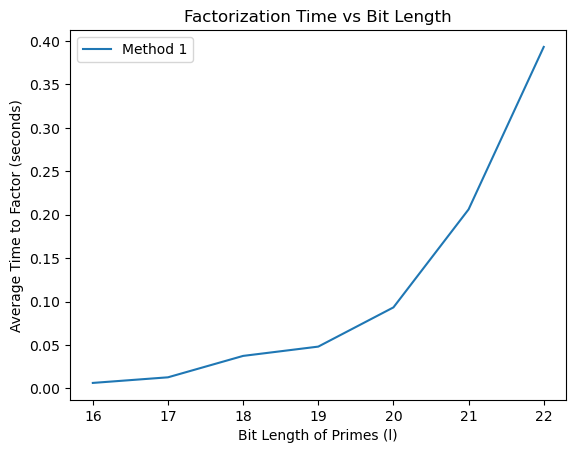

In [100]:
# Write the function to plot graphs for both methods
# def plot_graphs(data1, data2, data3):
#     x1 = np.array(data1[0])
#     y1 = np.array(data1[1])

#     x2 = np.array(data2[0])
#     y2 = np.array(data2[1])

#     x3 = np.array(data3[0])
#     y3 = np.array(data3[1])

#     plt.plot(x1, y1, label='Smallest Factor Method')
#     plt.plot(x2, y2, label='Pollard Rho Method V1')
#     plt.plot(x3, y3, label='Pollard Rho Method V2')

#     plt.title('Factorization Time vs Bit Length')
#     plt.xlabel('Bit Length of Primes (l)')
#     plt.ylabel('Average Time to Factor (seconds)')
#     plt.legend()
#     plt.show()

# Write an optimised function to plot graphs for both methods
def plot_graphs(*datasets, labels=None, title="Factorization Time vs Bit Length"):
    if labels is None:
        # Default labels: "Method 1", "Method 2", ...
        labels = [f"Method {i+1}" for i in range(len(datasets))]
    
    for (data, label) in zip(datasets, labels):
        x = np.array(data[0])
        y = np.array(data[1])
        plt.plot(x, y, label=label)

    plt.title(title)
    plt.xlabel("Bit Length of Primes (l)")
    plt.ylabel("Average Time to Factor (seconds)")
    plt.legend()
    plt.show()

# Plot graphs for the smallest factor and pollard rho version 1 data
plot_graphs(smallest_factor_data)

## In depth exploration of the Pollard Rho function

### First attempt at writing the Pollard Rho function (V2)

For our first version of the pollard rho function, we tried to recreate the example given in the pollard_rho.pdf. It was very useful to have this example to work with so we could compare the numbers we achieved versus those we'd expect at each iteration. It tool  a while to work out where within the algorithm to apply the function to m1 and m2 to get m1s and m2s, but the final result is quite simple.

Here's the example we started with: Consider the integer N = 78667. We make use of the pseudo-random sequence defined by m0 = 3, mi+1 = m2i −1 (mod N) to obtain a factorisation of N. The sequence is (3,8,63,3968,11623,22889,62767,52928,41313,4736,9600,...) so our algorithm computes, gcd(m2 −m1,N) = gcd(63 −8,78667) = 1, and continuing, that gcd(m2s −m1s,N) = 1 for s = 2,3,4. However, gcd(m10 −m5,N) = gcd(9600 −22889,78667) = 97 and so, as 78667/97 = 811 we have found the factorisation 78667 = 97 ·811.

Please wait, the code should take around 5 seconds to run.

In [119]:
# Pollard's rho algorithm for factorization, version 1 based on example
def pollard_rho_v1(N, max_iterations=10000):

    def f(x):
        return (x * x - 1) % N

    m0 = 3
    m1 = f(m0)
    m2 = f(f(m0))

    for i in range(1, max_iterations):  # Limit iterations to avoid infinite loops

        d = gcd(abs(m2 - m1), N)

        # print(m1, m2, d)  # Print the sequence values and gcd for tracing

        if d > 1 and d < N:
            return d  # Found a non-trivial factor
            
        m1 = f(m1)
        m2 = f(f(m2))
        
    return None  # No factor found within the iteration limit

# Test whether the function works as intended for inputs in the exampls
N = 78667
print("Testing Pollard Rho v1 with N =", N)
factor = pollard_rho_v1(N)
print("Found factor: ", factor)
if factor == 97:
    print("Found factor is correct.\n")

# Test whether the function works as intended for random p and q
print("Testing Pollard Rho v1 with random N for 16 bit p and q:")
test_factor_function(pollard_rho_v1)

# Generate data on pollard rho version 1 timings
print("\nTiming data for smallest factor function (bit lengths and average times):")
pollard_rho_data_v1 = time_factorisation(l, max_time, iterations, pollard_rho_v1)
print(pollard_rho_data_v1)

Testing Pollard Rho v1 with N = 78667
Found factor:  97
Found factor is correct.

Testing Pollard Rho v1 with random N for 16 bit p and q:
p = 46993
q = 33773
N = 1587094589
Found factor: 33773
Found factor is correct.

Timing data for smallest factor function (bit lengths and average times):
[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], [0.012119054794311523, 0.008637189865112305, 0.025933027267456055, 0.015262126922607422, 0.018537044525146484, 0.023188114166259766, 0.010968208312988281, 0.04547595977783203, 0.01129007339477539, 0.12893414497375488, 0.15354394912719727, 0.17589497566223145, 0.1695423126220703, 0.1751391887664795, 0.18947792053222656, 0.19635319709777832, 0.21313095092773438, 0.20989108085632324, 0.21901202201843262, 0.227708101272583, 0.23998808860778809, 0.24080395698547363, 0.23621416091918945, 0.24520421028137207, 0.24731802940368652, 0.25166893005371094, 0.26149988174438477, 0.26

### Quick test of efficiency of smallest factor function vs Pollard Rho (V1)

It is clear to see that the pollard rho function reaches larger bit lengths before superceding the max average time restriction. However, to make this truly comparable, we have followed the next step of the question which was to plot the results.

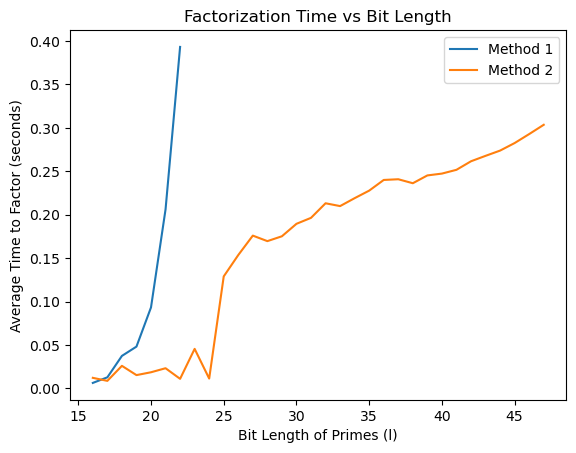

In [120]:
plot_graphs(smallest_factor_data, pollard_rho_data_v1)

### Second attempt at writing the Pollard Rho function (V2)

Later we will also plot expected out- comes (extrapolated from our results) on longer bit lengths, but for our initial testing we have just plotted up to 0.5 seconds. First, I create an optimised version of the pollard rho algorithm which randomises the function used each time rather than just using the function in the example.

Please wait, the code should take around 3 seconds to run.

In [121]:
# Pollard's rho algorithm for factorization, version 1 based on description
def pollard_rho_v2(N, max_iterations=10000):

    c = random.randrange(1, N-1)  # Random constant for the polynomial
    def f(x):
        return (x * x + c) % N

    m0 = random.randrange(2, N-2)
    m1 = f(m0)
    m2 = f(f(m0))

    for i in range(1, max_iterations):  # Limit iterations to avoid infinite loops

        d = gcd(abs(m2 - m1), N)

        # print(m1, m2, d)  # Print the sequence values and gcd for tracing

        if d > 1 and d < N:
            return d  # Found a non-trivial factor

        m1 = f(m1)
        m2 = f(f(m2))
        
    return None  # No factor found within the iteration limit

# Test whether the function still works for inputs in the exampls
N = 78667
print("Testing Pollard Rho v2 with N =", N)
factor = pollard_rho_v2(N)
print("Found factor: ", factor)
if factor == 97:
    print("Found factor is correct.\n")

# Test whether the function works as intended for random p and q
print("Testing Pollard Rho v2 with random N for 16 bit p and q:")
test_factor_function(pollard_rho_v2)

Testing Pollard Rho v2 with N = 78667
Found factor:  97
Found factor is correct.

Testing Pollard Rho v2 with random N for 16 bit p and q:
p = 60773
q = 42433
N = 2578780709
Found factor: 42433
Found factor is correct.


### Similarities between the two Pollard Rho functions (V1) and (V2)

Surprisingly there was no immediate apparent difference, so we plotted all three lines of a graph.

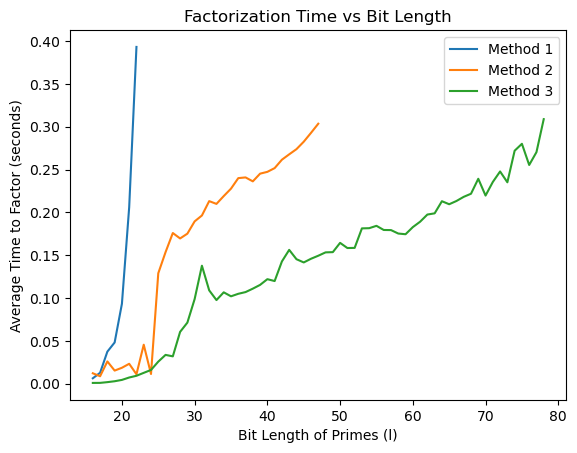

In [122]:
# Plot graphs for the smallest factor and pollard rho version 1 data
plot_graphs(smallest_factor_data, pollard_rho_data_v1, pollard_rho_data_v2)

### Differences between the two Pollard Rho functions (V1) and (V2)

Surprisingly there was no immediate apparent difference, so we plotted all three lines of a graph.

[[16, 17, 18, 19, 20, 21, 22], [0.006262421607971191, 0.012723040580749512, 0.03737828731536865, 0.04808223247528076, 0.0932340145111084, 0.20608346462249755, 0.39318180084228516]] [[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57], [0.004941821098327637, 0.0011077165603637696, 0.0013717412948608398, 0.002200007438659668, 0.003357243537902832, 0.005609965324401856, 0.007155799865722656, 0.011885476112365723, 0.013687205314636231, 0.0153550386428833, 0.04798903465270996, 0.0494448184967041, 0.05498237609863281, 0.0737112283706665, 0.07972629070281982, 0.08480391502380372, 0.09395334720611573, 0.09453990459442138, 0.10024149417877197, 0.11082751750946045, 0.11134457588195801, 0.12094967365264893, 0.10862383842468262, 0.11613571643829346, 0.12342596054077148, 0.12178776264190674, 0.12261168956756592, 0.12784986495971679, 0.1307133197784424, 0.12873330116271972, 0.14820578

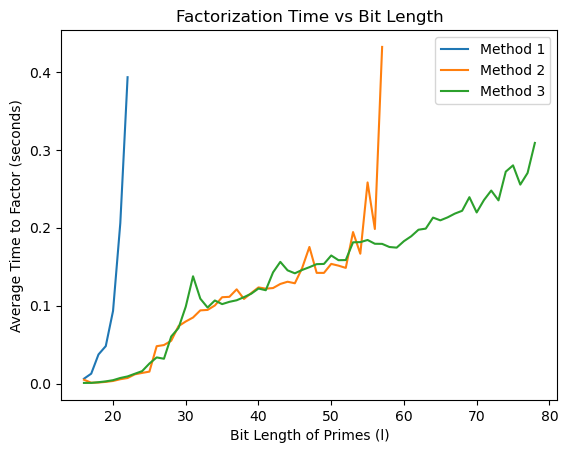

In [111]:
# # Graph2 will elucidate the performance difference between pollard rho version 1 and version 2
# max_time = 0.3
# iterations = 10

# # Generate data on smallest factor function timings
# smallest_factor_data = time_factorisation(l, max_time, iterations, smallest_factor)
# print("Timing data for smallest factor function (bit lengths and average times):")
# print(smallest_factor_data)

# # Generate data on pollard rho version 1 timings
# print("\nTiming data for smallest factor function (bit lengths and average times):")
# pollard_rho_data_v1 = time_factorisation(l, max_time, iterations, pollard_rho_v1)
# print(pollard_rho_data_v1)

# # Generate data on pollard rho version 2 timings
# print("\nTiming data for smallest factor function (bit lengths and average times):")
# pollard_rho_data_v1 = time_factorisation(l, max_time, iterations, pollard_rho_v1)
# print(pollard_rho_data_v1)

# # Save data to JSON file
# data = {
#     "smallest_factor_data": smallest_factor_data,
#     "pollard_rho_data_v1": pollard_rho_data_v1,
#     "pollard_rho_data_v2": pollard_rho_data_v2
# }

# with open("graph2_lists.json", "w") as f:
#     json.dump(data, f)

# Retrieve data from JSON file
with open("graph2_lists.json", "r") as f:
    data = json.load(f)

smallest_factor_data = data["smallest_factor_data"]
pollard_rho_data_v1 = data["pollard_rho_data_v1"]
pollard_rho_data_v2 = data["pollard_rho_data_v2"]

print(smallest_factor_data, pollard_rho_data_v1, pollard_rho_data_v2)
plot_graphs(smallest_factor_data, pollard_rho_data_v1, pollard_rho_data_v2)

## In depth investigatio of smallest factor vs Pollard Rho (V2) functions

### Generating data for larger times

### Extrapolating from these results

### Discussion of unfeasabile timings

We will now plot calculate the same data but on the scale of minutes, as well as plot expected out- comes (extrapolated from your results) on longer bit lengths. We will hence conjecture at what bit length the use of each function becomes unfeasible.

In [ ]:
# # Graph3 will elucidate the performance difference between pollard rho version 1 and version 2
# max_time = 15
# iterations = 1

# # Generate data on smallest factor function timings
# smallest_factor_data = time_factorisation(l, max_time, iterations, smallest_factor)
# print("Timing data for smallest factor function (bit lengths and average times):")
# print(smallest_factor_data)

# # Generate data on pollard rho version 2 timings
# print("\nTiming data for smallest factor function (bit lengths and average times):")
# pollard_rho_data_v1 = time_factorisation(l, max_time, iterations, pollard_rho_v1)
# print(pollard_rho_data_v1)

# # Save data to JSON file
# data = {
#     "smallest_factor_data": smallest_factor_data,
#     "pollard_rho_data_v1": pollard_rho_data_v1,
#     "pollard_rho_data_v2": pollard_rho_data_v2
# }

# with open("graph3_lists.json", "w") as f:
#     json.dump(data, f)

# # Retrieve data from JSON file
# with open("graph2_lists.json", "r") as f:
#     data = json.load(f)

# smallest_factor_data = data["smallest_factor_data"]
# pollard_rho_data_v1 = data["pollard_rho_data_v1"]
# pollard_rho_data_v2 = data["pollard_rho_data_v2"]

# print(smallest_factor_data, pollard_rho_data_v2)
# plot_graphs(smallest_factor_data, pollard_rho_data_v2)

# Conclusion and Reflections

In conclusion, through this project we found that...